# Tutorial: Analysis of 3D data cubes

## Example: astronomical images

- Download you favourite galaxy from the THINGS survey database: https://www2.mpia-hd.mpg.de/THINGS/Data.html


- HI emission (21 cm) -> hyperfine structure of the H atom


- See some further details on this lecture:

Spectral analysis:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/119-exercise-spectral-fitting.ipynb

Image analysis:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-2/204-exercise-image-processing-astronomy.ipynb


- I will choose galaxy NGC 3184.


To do list:

1. Read in a fits file containing the 3D data cube of this galaxy.


2. Plot slices of the 3D data cube, use a FOR loop to go over files and print images into a directory.


3. Overlay the HI data (21cm) onto an optical image.

### Libraries:

conda install astropy

conda install -c astropy astroquery

conda install reproject

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt

### Open file

In [3]:
filename = "NGC_3184_NA_CUBE_THINGS.FITS"

hdu = fits.open(filename)

FITS files:

- Header

- Data

In [4]:
header_hdu = hdu[0].header

In [5]:
data_hdu = hdu[0].data

In [9]:
#print(header_hdu)
#print(header_hdu.keys)

In [11]:
print(data_hdu.shape)

(1, 72, 1024, 1024)


### Slice data cube

#### 1. Spatial slices

In [17]:
slice_1 = data_hdu[0, 30, :, :]

slice_2 = data_hdu[0, 40, :, :]

slice_3 = data_hdu[0, 50, :, :]

print(slice_1.shape)

(1024, 1024)


In [18]:
%matplotlib inline

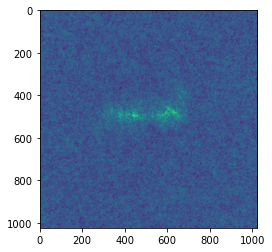

In [19]:
plt.imshow(slice_1)

Text(0.5, 1.0, 'Slice 3')

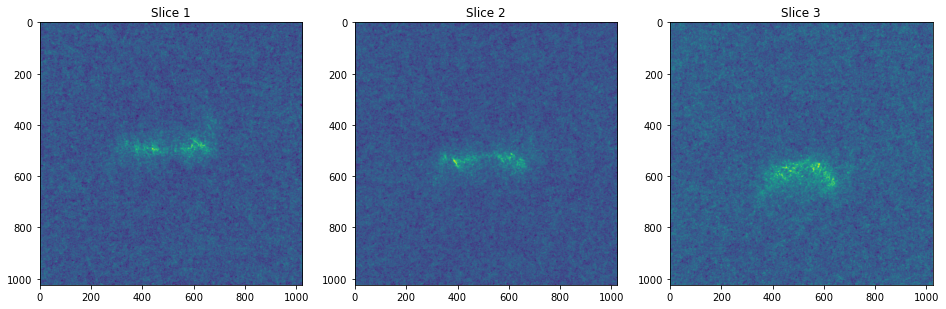

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,8))

ax1.imshow(slice_1, cmap = 'viridis')
ax1.set_title("Slice 1")

ax2.imshow(slice_2, cmap = 'viridis')
ax2.set_title("Slice 2")

ax3.imshow(slice_3, cmap = 'viridis')
ax3.set_title("Slice 3")

In [21]:
import os

In [ ]:
os.mkdir("./spatial_slices")

## Print all images into this directory:

In [27]:
print(data_hdu.shape[1])

72


In [31]:
1024*1024*8*72

603979776

In [32]:
for i in range(0, data_hdu.shape[1]):
    
    slice = data_hdu[0, i, :, :]
    
    fig  = plt.figure(figsize=(12,12))
    
    ax = fig.add_subplot(1,1,1)
    
    plt.imshow(slice)
    
    plt.savefig("./spatial_slices/spatial_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

In [33]:
#os.mkdir("./spatial_slices")

FileExistsError: [Errno 17] File exists: './spatial_slices'

In [34]:
if os.path.isdir("./spatial_slices"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./spatial_slices")

Directory already exists.


In [35]:
if os.path.isdir("./spatial_slices1"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./spatial_slices1")

Directory is being created.


## With correct units

In [36]:
from astropy.wcs import WCS

In [37]:
for i in range(0, data_hdu.shape[1]):
    
    slice = data_hdu[0, i, :, :]
    
    fig  = plt.figure(figsize=(12,12))
    
    ax = fig.add_subplot(1,1,1, projection = WCS(header_hdu), slices = ('x', 'y', 50, 0))
    
    plt.imshow(slice)
    
    plt.savefig("./spatial_slices1/spatial_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

#### Frequency slices

In [38]:
slice_4 = data_hdu[0,:,:,400]

slice_5 = data_hdu[0,:,:,500]

slice_6 = data_hdu[0,:,:,600]

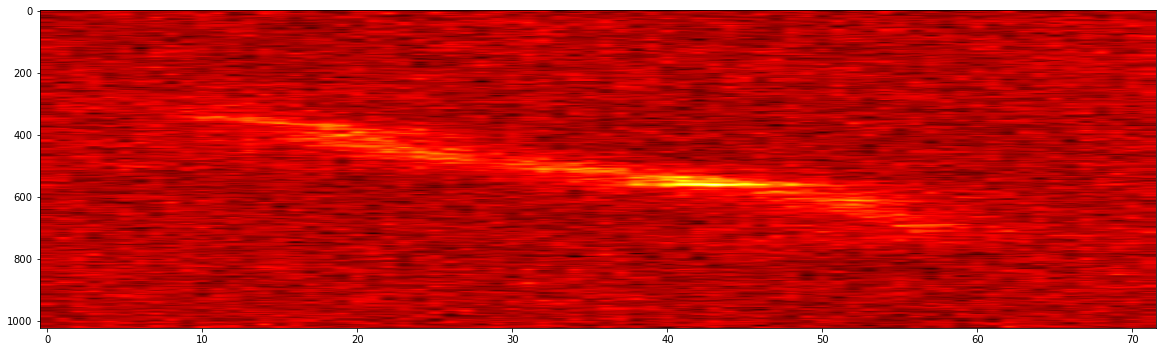

In [47]:
fig, ax = plt.subplots(figsize = (20,20))

plt.imshow(slice_4.T, cmap = "hot", aspect = 1/50)

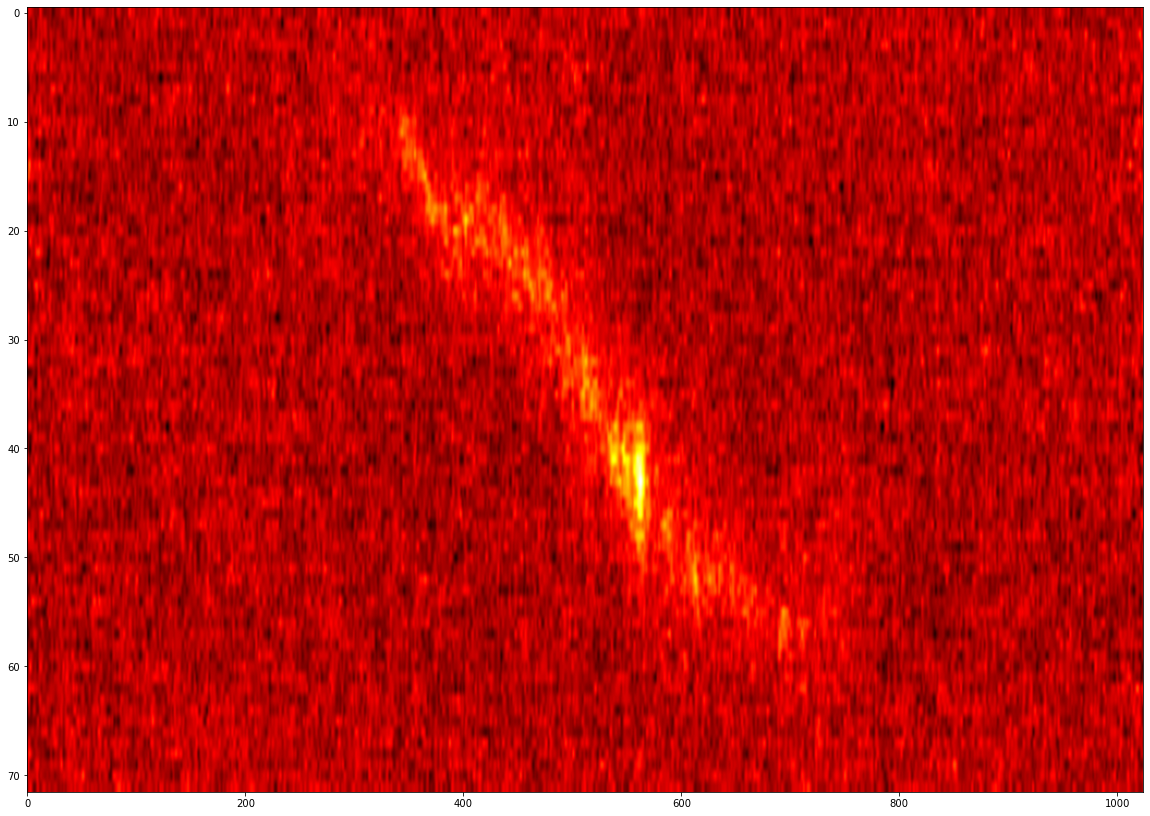

In [51]:
fig, ax = plt.subplots(figsize = (20,40))

plt.imshow(slice_4, cmap = "hot", aspect = 10)

Text(0.5, 1.0, 'Slice 6')

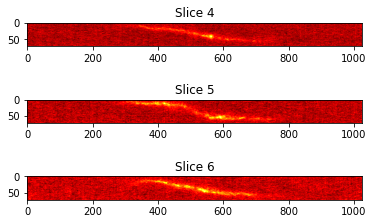

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.imshow(slice_4, cmap = 'hot')
ax1.set_title("Slice 4")

ax2.imshow(slice_5, cmap = 'hot')
ax2.set_title("Slice 5")

ax3.imshow(slice_6, cmap = 'hot')
ax3.set_title("Slice 6")

In [53]:
if os.path.isdir('./frequency_slices'):
    print("directory does exist")
else:
    print("creates directory")
    os.mkdir('./frequency_slices')

creates directory


In [55]:
for i in range(0, data_hdu.shape[2], 10):
    
    slice = data_hdu[0,:,:,i]
    #print(i)
    
    fig = plt.figure(figsize=(11,10))
    
    ax = fig.add_subplot(1,1,1, projection = WCS(header_hdu), slices = (0, 'x', 'y', 0))
    
    plt.imshow(slice, cmap = 'hot', aspect=5)
    
    plt.savefig("./frequency_slices/frequency_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

https://gleamoscope.icrar.org/gleamoscope/trunk/src/

In [57]:
from astropy.coordinates import SkyCoord

from astropy import units as u

In [58]:
coord = SkyCoord(header_hdu['CRVAL1'], header_hdu['CRVAL2'], unit="deg")

In [59]:
print(coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (154.57041667, 41.42444444)>


In [60]:
print(coord.to_string('hmsdms'))

10h18m16.9s +41d25m28s


### https://skyview.gsfc.nasa.gov/current/cgi/titlepage.pl